In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# learning_rate: [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate

learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                          input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    
    optimizer = keras.optimizers.SGD(lr)
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    callbacks = [
        keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)
    ]
    
    history = model.fit(x_train_scaled, y_train,
                   validation_data=(x_valid_scaled, y_valid),
                   epochs=100,
                   callbacks=callbacks)
    histories.append(history)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 4.6599 - val_loss: 3.9612
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 3.2189 - val_loss: 2.8407
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 2.3471 - val_loss: 2.1520
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 1.8081 - val_loss: 1.7198
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 1.4673 - val_loss: 1.4421
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 1.2472 - val_loss: 1.2588
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 1.1015 - val_loss: 1.1352
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0030 - val_loss: 1.0496
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.9347 - val_loss: 0.9888
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8862 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 2.0754 - val_loss: 1.5921
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3372 - val_loss: 1.1518
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 1.0253 - val_loss: 0.9605
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8813 - val_loss: 0.8743
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8091 - val_loss: 0.8286
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7681 - val_loss: 0.8001
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7418 - val_loss: 0.7799
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7224 - val_loss: 0.7641
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7073 - val_loss: 0.7512
Epoch 11/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6949 - val_loss: 0.7404


363/363 [==============================] - 0s 1ms/step - loss: 0.4303 - val_loss: 0.4541
Epoch 25/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.4514
Epoch 26/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4269 - val_loss: 0.4488
Epoch 27/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4252 - val_loss: 0.4471
Epoch 28/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4233 - val_loss: 0.4456
Epoch 29/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4223 - val_loss: 0.4441
Epoch 30/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4208 - val_loss: 0.4416
Epoch 31/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4196 - val_loss: 0.4406
Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3072 - val_loss: 0.7940
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6861 - val_loss: 0.

Learning rate: 0.0001


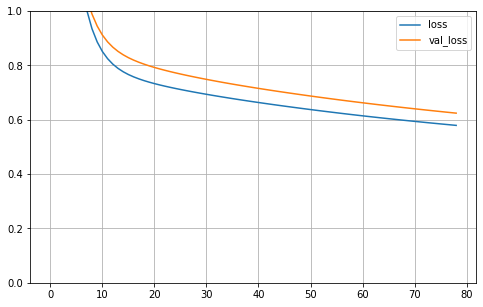

Learning rate: 0.0003


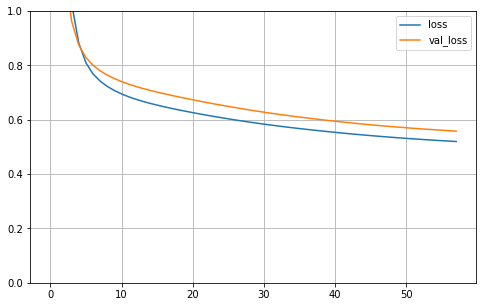

Learning rate: 0.001


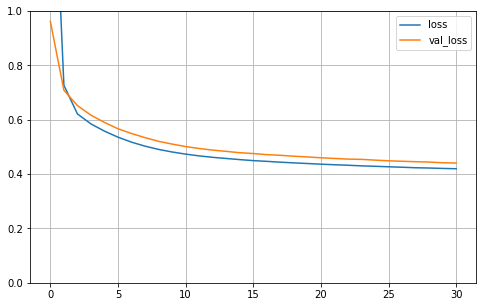

Learning rate: 0.003


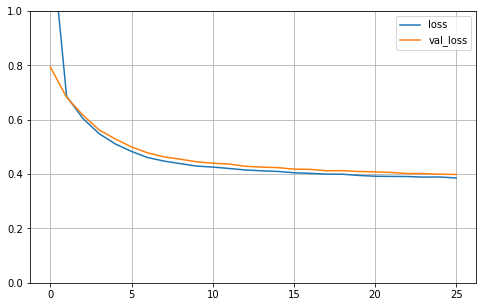

Learning rate: 0.01


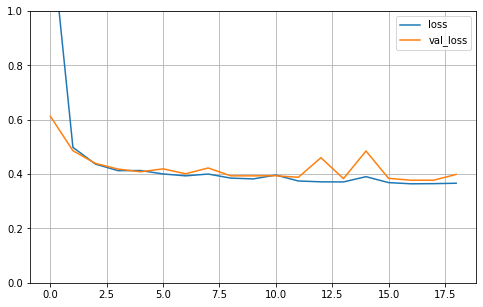

Learning rate: 0.03


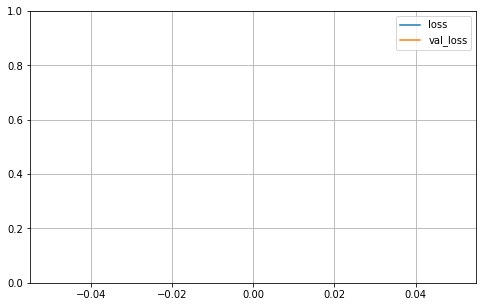

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

for lr, history in zip(learning_rates, histories):
    print('Learning rate:', lr)
    plot_learning_curves(history)